In [5]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from alpha_vantage.timeseries import TimeSeries 

print("All libraries loaded")

All libraries loaded


In [6]:
config = {
    "alpha_vantage": {
        "key": "XYTTZEVFH66ROFTB", # Claim your free API key here: https://www.alphavantage.co/support/#api-key
        "symbol": "IBM",
        "outputsize": "full",
        "key_adjusted_close": "5. adjusted close",
    },
    "data": {
        "window_size": 20,
        "train_split_size": 0.80,
    }, 
    "plots": {
        "xticks_interval": 90, # show a date every 90 days
        "color_actual": "#001f3f",
        "color_train": "#3D9970",
        "color_val": "#0074D9",
        "color_pred_train": "#3D9970",
        "color_pred_val": "#0074D9",
        "color_pred_test": "#FF4136",
    },
    "model": {
        "input_size": 1, # since we are only using 1 feature, close price
        "num_lstm_layers": 2,
        "lstm_size": 32,
        "dropout": 0.2,
    },
    "training": {
        "device": "cpu", # "cuda" or "cpu"
        "batch_size": 64,
        "num_epoch": 100,
        "learning_rate": 0.01,
        "scheduler_step_size": 40,
    }
}

In [59]:
import pandas as pd
ts = TimeSeries(key=config["alpha_vantage"]["key"], output_format='pandas')
spx = ts.get_daily('COKE', outputsize='full')[0]
spx

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-19,480.10,495.62,472.9377,490.88,34968.0
2022-04-18,495.00,495.00,470.0100,475.09,40538.0
2022-04-14,497.70,503.50,492.6000,492.70,17272.0
2022-04-13,489.31,495.13,488.5500,494.25,32701.0
2022-04-12,487.30,494.98,482.8472,488.98,29179.0
...,...,...,...,...,...
1999-11-05,51.31,52.00,50.6300,50.69,8200.0
1999-11-04,51.00,52.00,50.8800,51.00,2900.0
1999-11-03,52.00,52.00,50.6300,52.00,2700.0


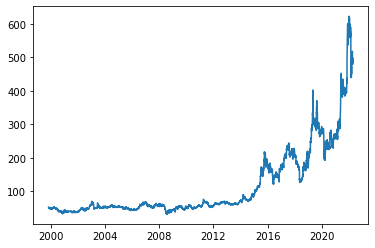

In [60]:
import plotly.express as px

plt.plot(spx.index,spx['1. open'])

In [58]:
ts.get_symbol_search(keywords = 'coke')[0]

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
date,,,,,,,,,
1970-01-01,COKE,Coca-Cola Consolidated Inc,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
